In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-dataset


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import *
from sklearn.manifold import *
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Input
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
sns.set()

In [3]:
os.listdir('/kaggle/input/brain-tumor-dataset')

['brain_tumor_dataset.csv']

In [4]:
df = pd.read_csv('/kaggle/input/brain-tumor-dataset/brain_tumor_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [5]:
df.shape

(20000, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [7]:
df.apply(pd.isnull).sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [8]:
df['Tumor_Type'].value_counts()

Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64

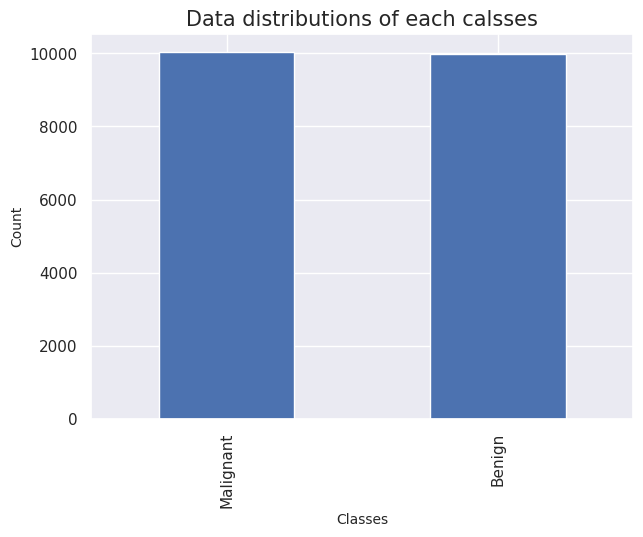

In [9]:
df['Tumor_Type'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distributions of each calsses', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

In [10]:
df.drop(columns = ['Patient_ID'], axis = 1, inplace = True)

In [11]:
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [12]:
df.columns

Index(['Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location', 'Histology',
       'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment',
       'Surgery_Performed', 'Chemotherapy', 'Survival_Rate',
       'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

In [13]:
categorical_columns, numerical_columns = [], []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [14]:
print(numerical_columns)

['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']


In [15]:
print(categorical_columns)

['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required']


Number of unique values are in Gender column: <bound method IndexOpsMixin.nunique of 0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
19995      Male
19996    Female
19997    Female
19998      Male
19999      Male
Name: Gender, Length: 20000, dtype: object>
Unique values in Gender column are: ['Male' 'Female']
Value counts of Gender column is:
 Gender
Female    10016
Male       9984
Name: count, dtype: int64


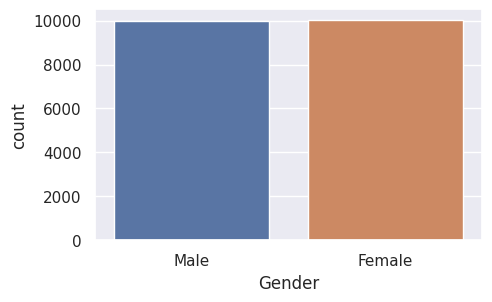

Number of unique values are in Tumor_Type column: <bound method IndexOpsMixin.nunique of 0        Malignant
1           Benign
2           Benign
3        Malignant
4           Benign
           ...    
19995    Malignant
19996       Benign
19997       Benign
19998    Malignant
19999       Benign
Name: Tumor_Type, Length: 20000, dtype: object>
Unique values in Tumor_Type column are: ['Malignant' 'Benign']
Value counts of Tumor_Type column is:
 Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64


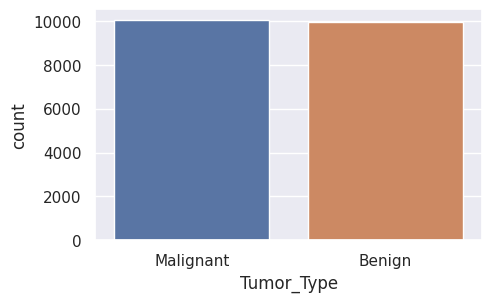

Number of unique values are in Location column: <bound method IndexOpsMixin.nunique of 0        Temporal
1        Parietal
2        Parietal
3        Temporal
4        Parietal
           ...   
19995    Parietal
19996    Temporal
19997    Temporal
19998    Parietal
19999    Temporal
Name: Location, Length: 20000, dtype: object>
Unique values in Location column are: ['Temporal' 'Parietal' 'Frontal' 'Occipital']
Value counts of Location column is:
 Location
Temporal     5118
Parietal     4990
Occipital    4967
Frontal      4925
Name: count, dtype: int64


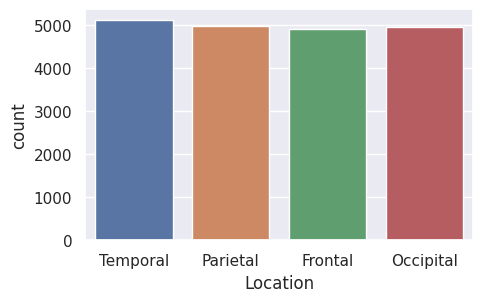

Number of unique values are in Histology column: <bound method IndexOpsMixin.nunique of 0            Astrocytoma
1           Glioblastoma
2             Meningioma
3        Medulloblastoma
4           Glioblastoma
              ...       
19995    Medulloblastoma
19996         Meningioma
19997    Medulloblastoma
19998       Glioblastoma
19999    Medulloblastoma
Name: Histology, Length: 20000, dtype: object>
Unique values in Histology column are: ['Astrocytoma' 'Glioblastoma' 'Meningioma' 'Medulloblastoma']
Value counts of Histology column is:
 Histology
Glioblastoma       5068
Meningioma         5016
Medulloblastoma    4979
Astrocytoma        4937
Name: count, dtype: int64


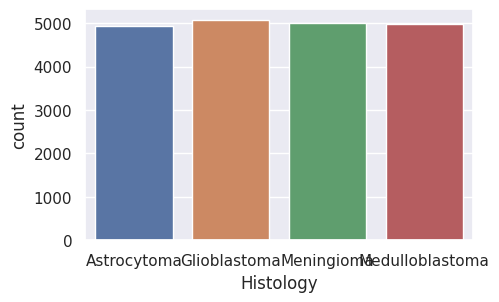

Number of unique values are in Stage column: <bound method IndexOpsMixin.nunique of 0        III
1         II
2          I
3         IV
4          I
        ... 
19995    III
19996    III
19997      I
19998    III
19999      I
Name: Stage, Length: 20000, dtype: object>
Unique values in Stage column are: ['III' 'II' 'I' 'IV']
Value counts of Stage column is:
 Stage
II     5093
I      4986
IV     4968
III    4953
Name: count, dtype: int64


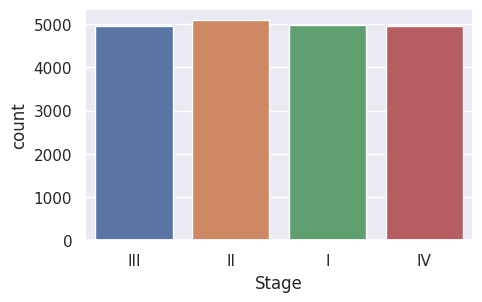

Number of unique values are in Symptom_1 column: <bound method IndexOpsMixin.nunique of 0        Vision Issues
1             Headache
2        Vision Issues
3        Vision Issues
4             Headache
             ...      
19995         Seizures
19996         Headache
19997         Seizures
19998         Seizures
19999    Vision Issues
Name: Symptom_1, Length: 20000, dtype: object>
Unique values in Symptom_1 column are: ['Vision Issues' 'Headache' 'Seizures' 'Nausea']
Value counts of Symptom_1 column is:
 Symptom_1
Headache         5045
Seizures         5028
Nausea           4969
Vision Issues    4958
Name: count, dtype: int64


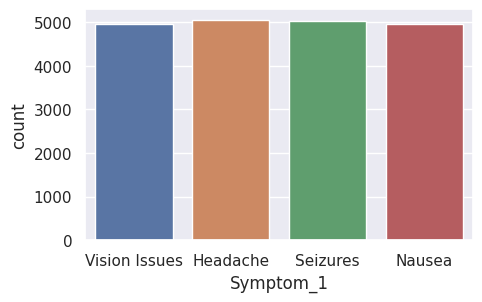

Number of unique values are in Symptom_2 column: <bound method IndexOpsMixin.nunique of 0             Seizures
1             Headache
2             Headache
3             Seizures
4             Headache
             ...      
19995           Nausea
19996         Headache
19997    Vision Issues
19998         Headache
19999         Seizures
Name: Symptom_2, Length: 20000, dtype: object>
Unique values in Symptom_2 column are: ['Seizures' 'Headache' 'Vision Issues' 'Nausea']
Value counts of Symptom_2 column is:
 Symptom_2
Seizures         5054
Vision Issues    5019
Headache         4996
Nausea           4931
Name: count, dtype: int64


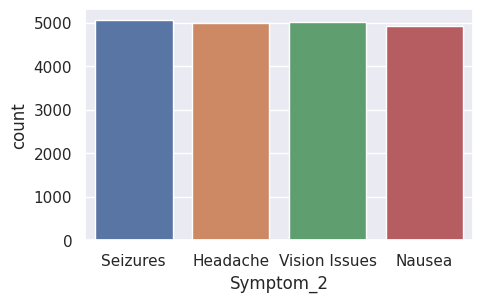

Number of unique values are in Symptom_3 column: <bound method IndexOpsMixin.nunique of 0             Seizures
1               Nausea
2             Seizures
3             Headache
4             Seizures
             ...      
19995    Vision Issues
19996    Vision Issues
19997           Nausea
19998    Vision Issues
19999           Nausea
Name: Symptom_3, Length: 20000, dtype: object>
Unique values in Symptom_3 column are: ['Seizures' 'Nausea' 'Headache' 'Vision Issues']
Value counts of Symptom_3 column is:
 Symptom_3
Seizures         5027
Nausea           5012
Vision Issues    5007
Headache         4954
Name: count, dtype: int64


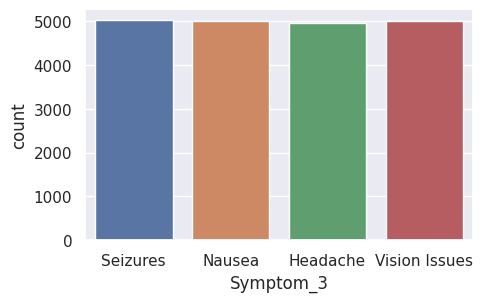

Number of unique values are in Radiation_Treatment column: <bound method IndexOpsMixin.nunique of 0         No
1        Yes
2         No
3        Yes
4         No
        ... 
19995     No
19996    Yes
19997     No
19998    Yes
19999     No
Name: Radiation_Treatment, Length: 20000, dtype: object>
Unique values in Radiation_Treatment column are: ['No' 'Yes']
Value counts of Radiation_Treatment column is:
 Radiation_Treatment
Yes    10021
No      9979
Name: count, dtype: int64


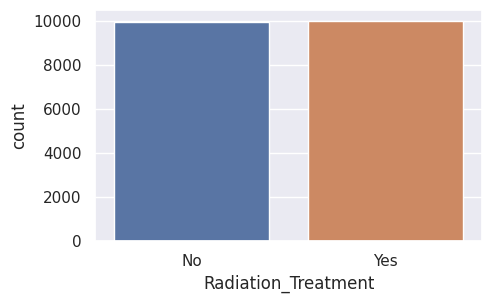

Number of unique values are in Surgery_Performed column: <bound method IndexOpsMixin.nunique of 0         No
1        Yes
2         No
3         No
4         No
        ... 
19995     No
19996    Yes
19997     No
19998    Yes
19999     No
Name: Surgery_Performed, Length: 20000, dtype: object>
Unique values in Surgery_Performed column are: ['No' 'Yes']
Value counts of Surgery_Performed column is:
 Surgery_Performed
Yes    10060
No      9940
Name: count, dtype: int64


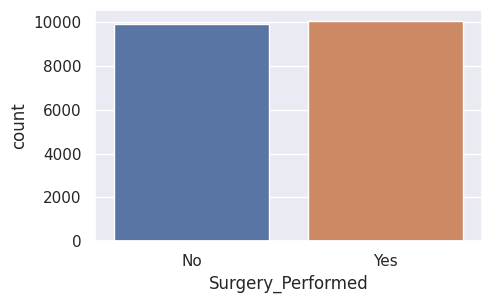

Number of unique values are in Chemotherapy column: <bound method IndexOpsMixin.nunique of 0         No
1        Yes
2         No
3        Yes
4        Yes
        ... 
19995    Yes
19996     No
19997    Yes
19998    Yes
19999     No
Name: Chemotherapy, Length: 20000, dtype: object>
Unique values in Chemotherapy column are: ['No' 'Yes']
Value counts of Chemotherapy column is:
 Chemotherapy
Yes    10097
No      9903
Name: count, dtype: int64


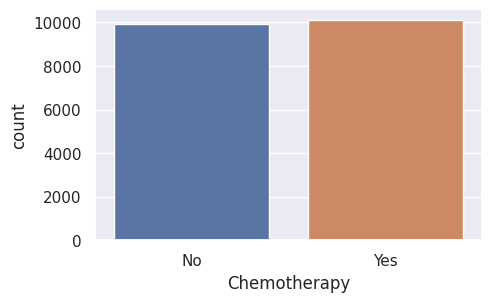

Number of unique values are in Family_History column: <bound method IndexOpsMixin.nunique of 0         No
1        Yes
2         No
3        Yes
4         No
        ... 
19995     No
19996     No
19997     No
19998     No
19999    Yes
Name: Family_History, Length: 20000, dtype: object>
Unique values in Family_History column are: ['No' 'Yes']
Value counts of Family_History column is:
 Family_History
No     10002
Yes     9998
Name: count, dtype: int64


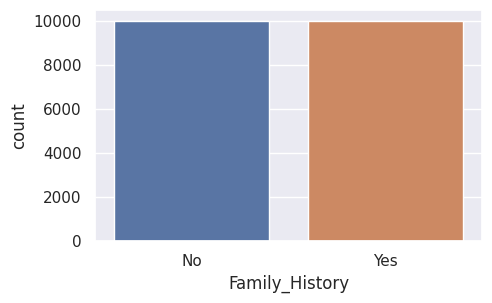

Number of unique values are in MRI_Result column: <bound method IndexOpsMixin.nunique of 0        Positive
1        Positive
2        Negative
3        Negative
4        Positive
           ...   
19995    Negative
19996    Positive
19997    Positive
19998    Positive
19999    Negative
Name: MRI_Result, Length: 20000, dtype: object>
Unique values in MRI_Result column are: ['Positive' 'Negative']
Value counts of MRI_Result column is:
 MRI_Result
Positive    10029
Negative     9971
Name: count, dtype: int64


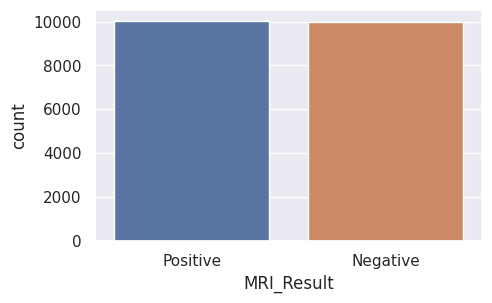

Number of unique values are in Follow_Up_Required column: <bound method IndexOpsMixin.nunique of 0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
19995    Yes
19996     No
19997    Yes
19998     No
19999    Yes
Name: Follow_Up_Required, Length: 20000, dtype: object>
Unique values in Follow_Up_Required column are: ['Yes' 'No']
Value counts of Follow_Up_Required column is:
 Follow_Up_Required
Yes    10101
No      9899
Name: count, dtype: int64


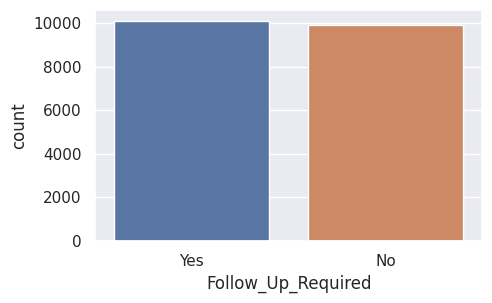

In [16]:
for column in categorical_columns:
    print(f'Number of unique values are in {column} column: {df[column].nunique}')
    print(f'Unique values in {column} column are: {df[column].unique()}')
    print(f'Value counts of {column} column is:\n {df[column].value_counts()}')
    plt.figure(figsize = (5, 3))
    sns.countplot(data = df, x = column)
    plt.show()
    print('=========================================================================')

In [17]:
df.describe()

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,49.433700,5.236552,70.131699,1.547701
std,17.389296,2.754359,17.270834,0.835995
min,20.000000,0.500410,40.002386,0.100017
25%,34.000000,2.836686,55.224439,0.830433
50%,49.000000,5.200675,70.305066,1.541821
75%,65.000000,7.624299,85.043395,2.262484
max,79.000000,9.999420,99.998125,2.999835


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


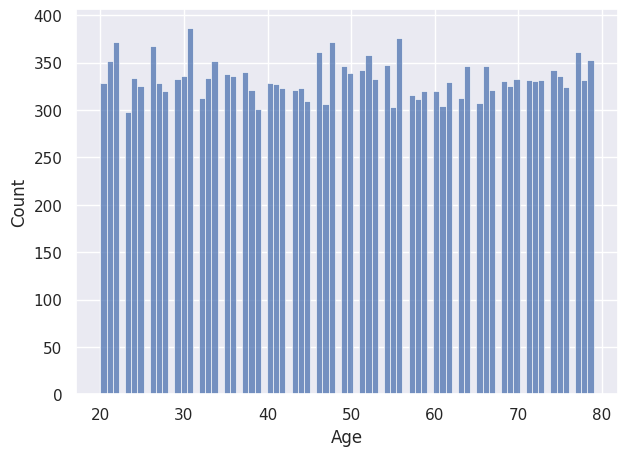

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


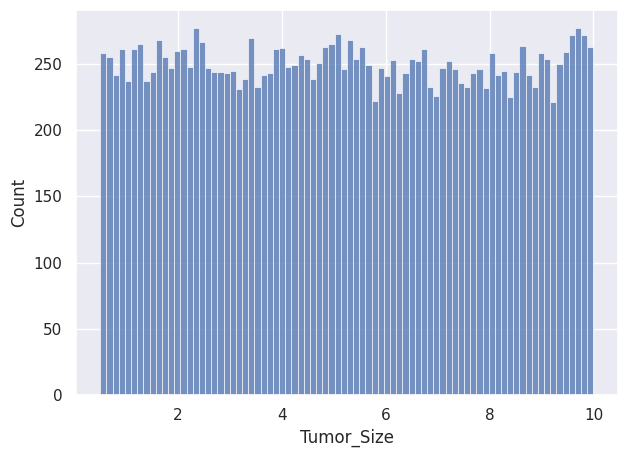

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


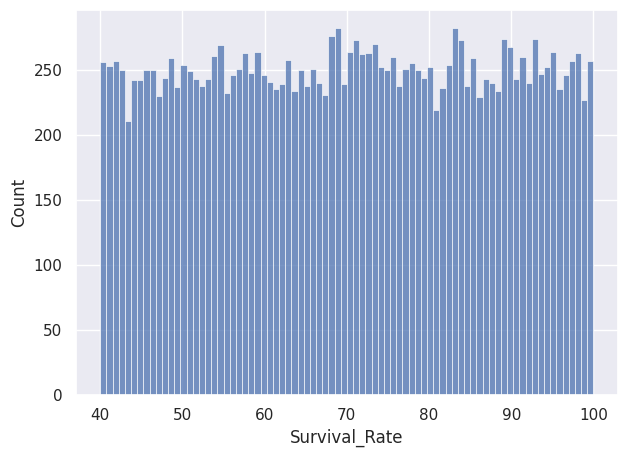

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


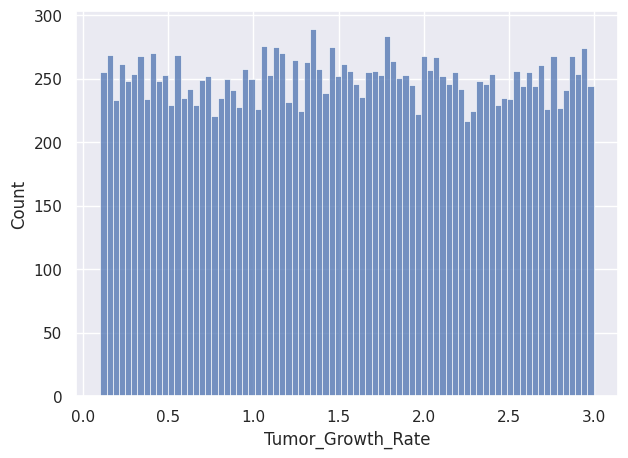

In [18]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df, x = column, bins = 80)
    plt.show()

In [19]:
categorical_columns.remove('Tumor_Type')

In [20]:
le = LabelEncoder()

In [21]:
df_dummies = pd.get_dummies(data = df, columns = categorical_columns, drop_first = True, dtype = 'int')

In [22]:
df_dummies.head()

,Age,Tumor_Type,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Male,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,...,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes
0,73,Malignant,5.375612,51.312579,0.111876,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
1,26,Benign,4.847098,46.373273,2.165736,1,0,1,0,1,...,0,1,0,0,1,1,1,1,1,1
2,31,Benign,5.588391,47.072221,1.884228,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,29,Malignant,1.436600,51.853634,1.283342,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,54,Benign,2.417506,54.708987,2.069477,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,1


In [23]:
df_dummies.shape

(20000, 30)

In [24]:
X = df_dummies.drop(columns = ['Tumor_Type'], axis = 1)
y = df_dummies['Tumor_Type']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, stratify = y)

In [26]:
print(f'Train set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Train set size: 16000
Test set size: 4000


In [27]:
df_dummies['Tumor_Type'] = le.fit_transform(df_dummies['Tumor_Type'])

In [28]:
labels = df_dummies['Tumor_Type'].astype('category').cat.codes

In [33]:
dim_red_algs = {'PCA': PCA, 'KernelPCA': KernelPCA, 'SparsePCA': SparsePCA, 'MiniBatchSparsePCA': MiniBatchSparsePCA, 'FastICA': FastICA,
               'tSNE': TSNE}

In [34]:
def dim_red(name, algs, data):
    al = algs(n_components = 2)
    data_tr = al.fit_transform(data)
    plt.figure(figsize = (7, 5))
    plt.scatter(data_tr[:,0], data_tr[:, 1], c = labels, s = 4, cmap = 'tab10')
    plt.title(name, fontsize = 15)
    plt.xlabel('PC1', fontsize = 10)
    plt.ylabel('PC2', fontsize = 10)
    plt.show()

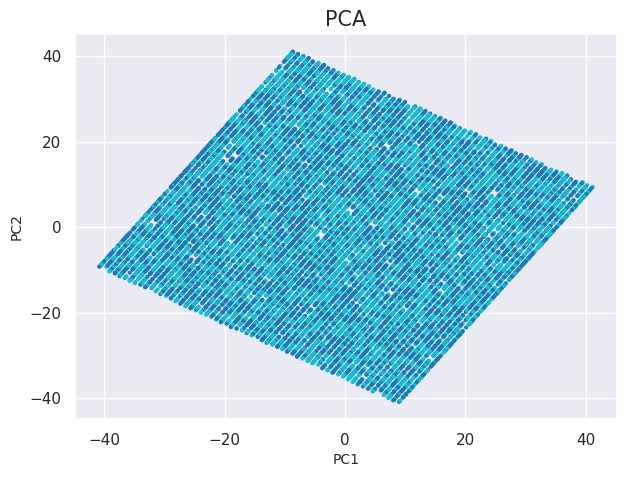

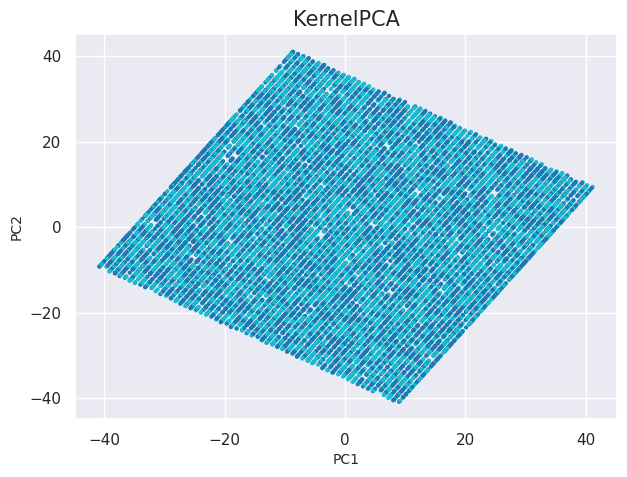

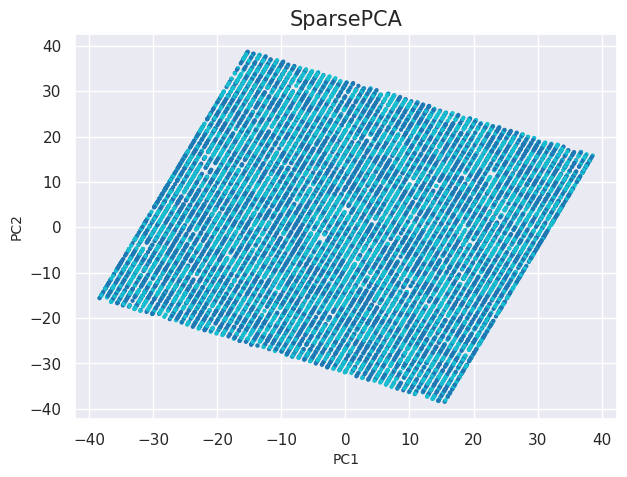

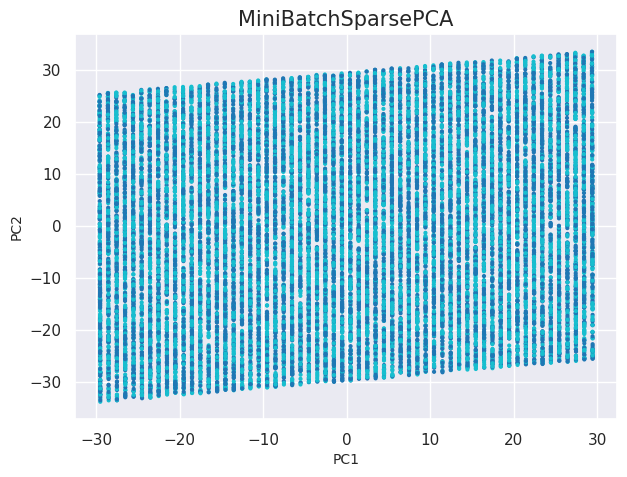

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


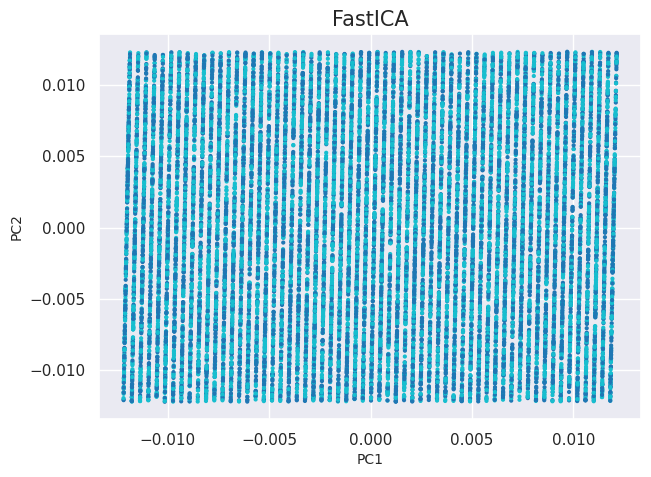

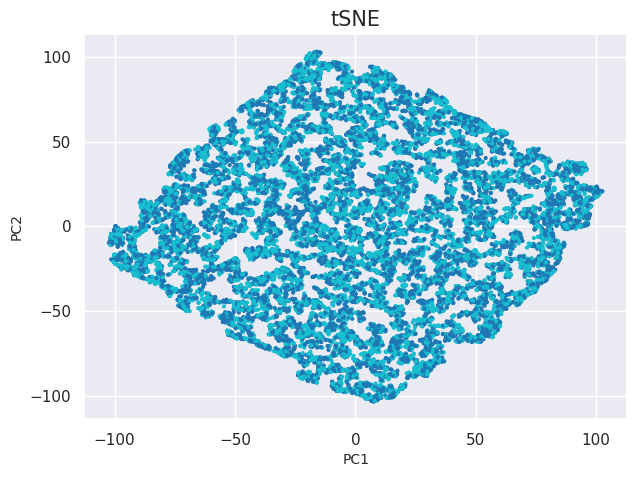

In [35]:
for name, algorithm in dim_red_algs.items():
    dim_red(name, algorithm, df_dummies)

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
X_test_scaled = scaler.transform(X_test)

In [42]:
input_dim = X_train.shape[1]

In [43]:
encoding_dim = 5

In [46]:
inputs = Input(shape = (input_dim,))
encoded = Dense(12, activation = 'relu')(inputs)
bottleneck = Dense(encoding_dim, activation = 'relu')(encoded)
decoded = Dense(12, activation = 'relu')(bottleneck)
outputs = Dense(input_dim, activation = 'linear')(decoded)

2025-05-06 14:49:50.093584: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [47]:
autoencoder = Model(inputs = inputs, outputs = outputs)

In [48]:
autoencoder.compile(
    optimizer = 'adam',
    loss = 'mse'
)

In [50]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)

In [51]:
history = autoencoder.fit(X_train_scaled, X_train_scaled, validation_split = 0.1, epochs = 200, batch_size = 64, callbacks = [early_stopping])

Epoch 1/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0240 - val_loss: 0.9148
Epoch 2/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8945 - val_loss: 0.8450
Epoch 3/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8394 - val_loss: 0.8068
Epoch 4/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8016 - val_loss: 0.7818
Epoch 5/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7803 - val_loss: 0.7666
Epoch 6/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7637 - val_loss: 0.7526
Epoch 7/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7481 - val_loss: 0.7414
Epoch 8/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7371 - val_loss: 0.7316
Epoch 9/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7258 - val_loss: 0.7193
Epoch 10/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7171 - val_loss: 0.7083
Epoch 11/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7062 - val_loss: 0.7017
Epoch 12/200
225/225 ━━━━━━━━━━━━━━━━━━━━

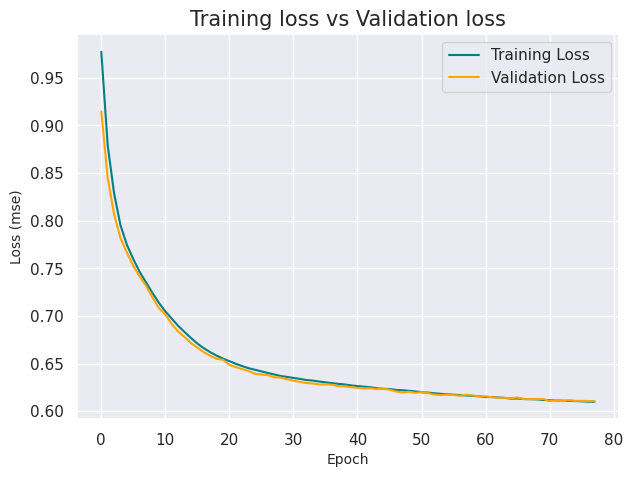

In [52]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 10)
plt.ylabel('Loss (mse)', fontsize = 10)
plt.legend()
plt.show()

In [53]:
encoder = Model(inputs = inputs, outputs = bottleneck)

In [54]:
X_train_encoded = encoder.predict(X_train_scaled)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [55]:
X_test_encoded = encoder.predict(X_test_scaled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
b = np.array([[2, 3, 4], [5, 6, 7]])
c = np.array([[8, 9, 10], [11, 12, 13]])

In [62]:
np.hstack((b, c))

array([[ 2,  3,  4,  8,  9, 10],
       [ 5,  6,  7, 11, 12, 13]])

In [63]:
X_train_combined = np.hstack((X_train_scaled, X_train_encoded))

In [64]:
X_test_combined = np.hstack((X_test_scaled, X_test_encoded))

In [65]:
df_train_combined = pd.DataFrame(X_train_combined, columns = [f'orig_{i}' for i in range(X.shape[1])] + [f'autoenc_{i}' for i in range(encoding_dim)])

In [66]:
df_test_combined = pd.DataFrame(X_test_combined, columns = df_train_combined.columns)

In [67]:
df_train_combined.shape

(16000, 34)

In [68]:
df_train_combined.head()

,orig_0,orig_1,orig_2,orig_3,orig_4,orig_5,orig_6,orig_7,orig_8,orig_9,...,orig_24,orig_25,orig_26,orig_27,orig_28,autoenc_0,autoenc_1,autoenc_2,autoenc_3,autoenc_4
0,-1.228775,-1.027580,1.134416,0.071646,0.998751,1.738716,-0.576388,-0.588128,-0.580141,1.730609,...,0.996382,-1.005892,1.00075,0.996008,0.992156,1.440348,8.032671,1.490816,6.710155,13.580921
1,-1.056247,0.201412,1.433397,-0.185235,0.998751,-0.575137,1.734942,-0.588128,-0.580141,1.730609,...,-1.003632,0.994142,-0.99925,-1.004008,-1.007906,0.896916,6.203370,0.640403,5.736763,9.256371
2,-1.401302,-0.740715,0.016317,-1.288287,-1.001251,-0.575137,-0.576388,-0.588128,-0.580141,-0.577831,...,0.996382,0.994142,1.00075,-1.004008,0.992156,6.258917,9.759165,9.571601,5.757603,14.329096
3,1.129104,0.246022,-0.532357,-0.924780,-1.001251,1.738716,-0.576388,-0.588128,-0.580141,1.730609,...,0.996382,-1.005892,-0.99925,-1.004008,0.992156,2.591184,1.634659,9.560454,4.839695,10.592506
4,0.669030,-1.001505,0.549358,-1.314866,-1.001251,-0.575137,-0.576388,-0.588128,-0.580141,1.730609,...,-1.003632,-1.005892,1.00075,0.996008,-1.007906,8.437138,7.109077,2.876323,3.103563,2.909198


In [69]:
df_train_combined['class'] = y_train

In [71]:
y_train

17144    Malignant
18568    Malignant
18998    Malignant
12428    Malignant
15172    Malignant
           ...    
6919        Benign
4374        Benign
10888       Benign
12597    Malignant
10559    Malignant
Name: Tumor_Type, Length: 16000, dtype: object

In [73]:
y_train_l = le.fit_transform(y_train)

In [74]:
y_test_l = le.transform(y_test)

In [75]:
df_train_combined.drop(columns = ['class'], axis = 1, inplace = True)

In [76]:
df_train_combined['class'] = y_train_l

In [77]:
df_train_combined.corr()['class'].sort_values(ascending = False)

class        1.000000
orig_19      0.019057
orig_7       0.013397
orig_0       0.011615
orig_22      0.010588
orig_25      0.010108
autoenc_0    0.009853
orig_12      0.008547
orig_28      0.007602
orig_23      0.006005
orig_14      0.005044
autoenc_2    0.004419
orig_6       0.003760
orig_10      0.002304
orig_3      -0.000559
orig_26     -0.000998
orig_16     -0.001288
orig_4      -0.002254
orig_20     -0.002306
orig_27     -0.003012
orig_9      -0.003609
orig_2      -0.004243
orig_21     -0.004765
autoenc_1   -0.004882
orig_18     -0.004909
orig_11     -0.005771
orig_24     -0.005886
orig_17     -0.008529
orig_15     -0.008954
autoenc_4   -0.009602
orig_8      -0.009948
orig_5      -0.010258
autoenc_3   -0.011379
orig_13     -0.016024
orig_1      -0.018516
Name: class, dtype: float64